### Spatial auto-correlation on number of reports about stores selling cigarette to minors

In [44]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pylab as plt
import pysal as ps
from geopandas import GeoDataFrame
import seaborn as sns; sns.set()
%matplotlib inline

In [45]:
# prepare census tract data
shape_path = "CT_Shape/ct_shape.shp"  
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [46]:
data1 = pd.read_csv('merged_data_1.1.csv')
data1.head()

,Unnamed: 0,id,BoroCT2010,n_report,DBN,school_distance,n_school,subway_distance,n_tobacco,Enrollment,...,Percent Hispanic,Percent Asian,% Female,% Poverty,MHI,Total Population,type,latitude,longitude,have_sold
0,0,19157,5000900,0.0,24Q600,2826.764130,0.0,79.859155,3,1575,...,0.757,0.112,0.377778,0.811429,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,0
1,1,18026,5000900,0.0,10X225,1703.127328,1.0,924.970954,3,427,...,0.700,0.009,0.674603,1.000000,56192,2112,CONVENIENCE STORE,40.641998,-74.078975,0
2,2,12113,5000900,0.0,28Q690,2929.402252,0.0,5998.612261,3,589,...,0.195,0.104,0.463497,0.728353,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,0
3,3,13601,5007400,0.0,15K448,1740.529846,0.0,2489.816362,2,415,...,0.422,0.046,0.508100,0.684831,65559,4693,GROCERY SUPERMARKET,40.591647,-74.067662,0
4,4,10482,5007400,0.0,23K493,630.587028,0.0,941.382096,2,307,...,0.114,0.010,0.387622,0.856678,65559,4693,GROCERY SUPERMARKET,40.595713,-74.063245,0


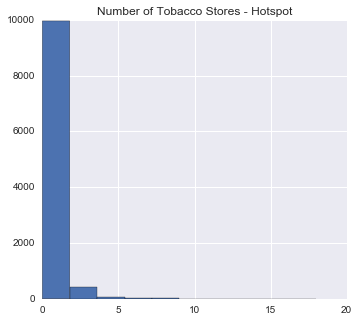

In [47]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
data1['n_report'].hist(bins=10)
ax.set_title('Number of Tobacco Stores - Hotspot')

In [48]:
data1['n_report'].sum()

2828.0

In [49]:
# agg selected attributes by BoroCT code
ct_data = data1.groupby('BoroCT2010', as_index=False)
ct_data = ct_data.agg({'n_report': 'sum','n_tobacco':'mean','MHI':'mean','Total Population':'mean','latitude':'mean','longitude':'mean'})
ct_data.index = ct_data.BoroCT2010.astype(str)
ct_data.head()

,BoroCT2010,Total Population,MHI,longitude,n_report,n_tobacco,latitude
BoroCT2010,,,,,,,
1000201,1000201,3058,18831,-73.987099,2.0,1,40.713973
1000202,1000202,7316,27288,-73.981750,1.0,4,40.714189
1000600,1000600,11367,18024,-73.989478,8.0,10,40.713431
1000700,1000700,8109,115472,-74.008078,0.0,27,40.705613
1000800,1000800,10290,30739,-73.996017,3.0,6,40.711888


In [50]:
# join with the shapefile
ct_shape_report = ct_shape.join(ct_data[['n_report','Total Population','MHI','n_tobacco']]) 
ct_shape_report.fillna(0,inplace=True)

In [51]:
ct_shape_report.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,n_report,Total Population,MHI,n_tobacco
BoroCT2010,,,,,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...,0.0,2112.0,56192.0,3.0
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...,3.0,2939.0,55139.0,4.0
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...,0.0,0.0,0.0,0.0
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...,0.0,0.0,0.0,0.0
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,...",13.0,3258.0,90000.0,4.0


//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


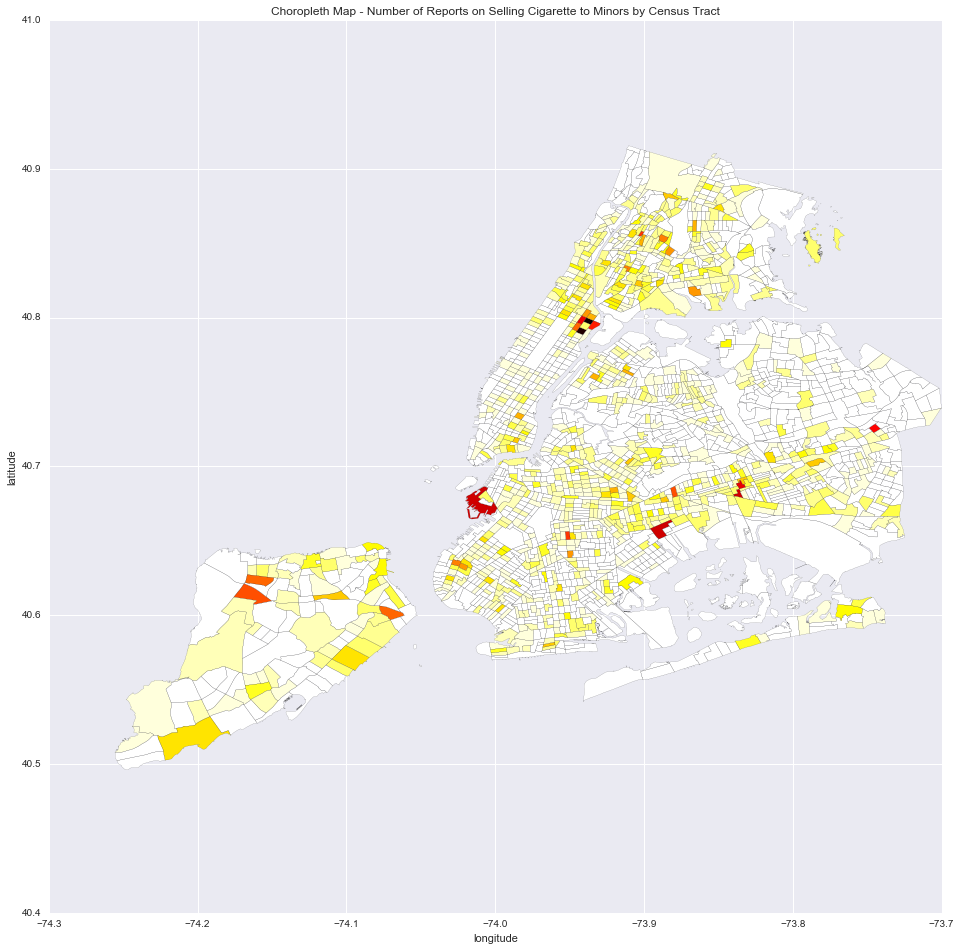

In [52]:
f, ax = plt.subplots(figsize=(16,16))
plt.xlabel('longitude')
plt.ylabel('latitude')

ct_shape_report.plot(column='n_report',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Choropleth Map - Number of Reports on Selling Cigarette to Minors by Census Tract")
plt.savefig('Map_NReports_CT.png')

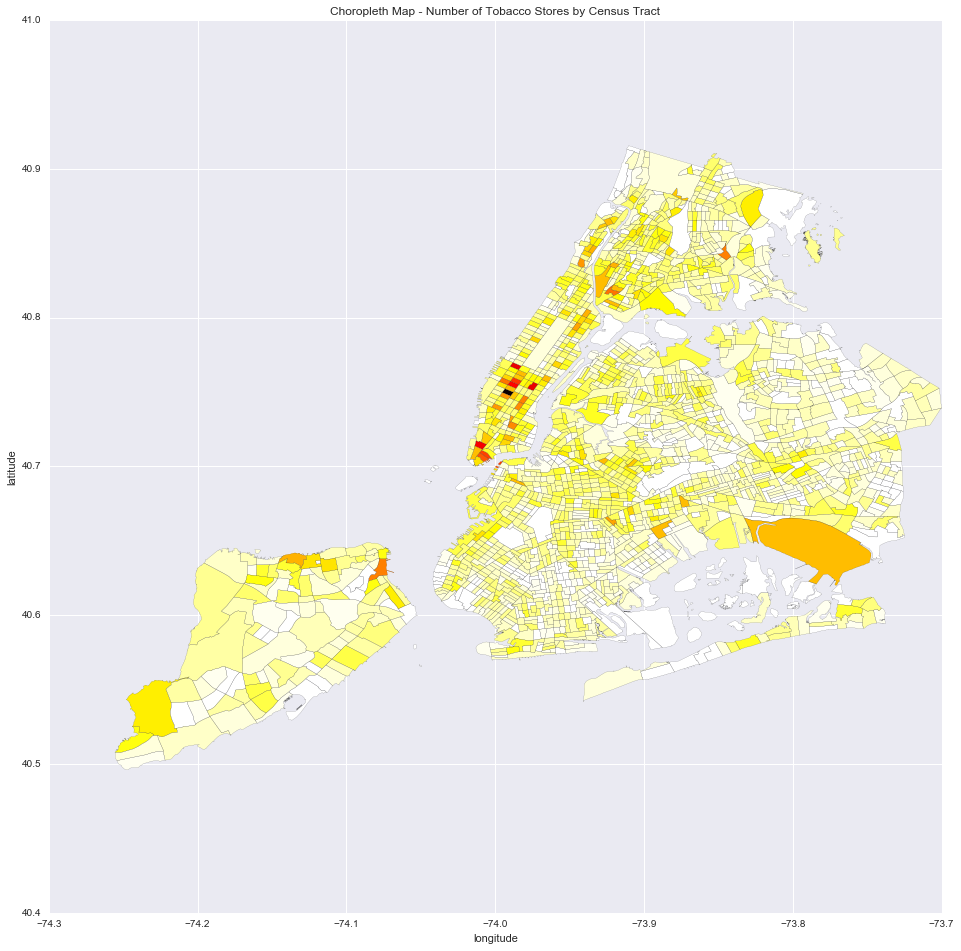

In [15]:
f, ax = plt.subplots(figsize=(16,16))
plt.xlabel('longitude')
plt.ylabel('latitude')

ct_shape_report.plot(column='n_tobacco',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Choropleth Map - Number of Tobacco Stores by Census Tract")
plt.savefig('Map_NStores_CT.png')

In [16]:
print "Total number of CTs:", len(ct_shape_report)
print "Number of CTs that has reports:", sum(ct_shape_report['n_report']<>0)

Total number of CTs: 2166
Number of CTs that has reports: 954


In [17]:
path = 'CT_Shape/ct_shape_report.shp'
ct_shape_report.to_file(path)

In [20]:
# using queen weight
qW_CT=ps.queen_from_shapefile(path)

('Island ids: ', [865, 1262, 1847])


In [21]:
Wmatrix, ids = qW_CT.full()

In [22]:
# changing to row-standardized
qW_CT.transform = 'r'

('WARNING: ', 865, ' is an island (no neighbors)')
('WARNING: ', 1262, ' is an island (no neighbors)')
('WARNING: ', 1847, ' is an island (no neighbors)')


In [23]:
#spatial lag
Report=ct_shape_report.n_report
ReportLag=ps.lag_spatial(qW_CT, Report)

In [24]:
# quantile k = 10
ReportLagQ10 = ps.Quantiles(ReportLag, k=10)
ReportLagQ10 

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  0.167               256
 0.167 < x[i] <=  0.333               218
 0.333 < x[i] <=  0.500               197
 0.500 < x[i] <=  0.750               219
 0.750 < x[i] <=  1.000               264
 1.000 < x[i] <=  1.333               178
 1.333 < x[i] <=  1.625               186
 1.625 < x[i] <=  2.143               215
 2.143 < x[i] <=  2.866               216
 2.866 < x[i] <= 16.833               217

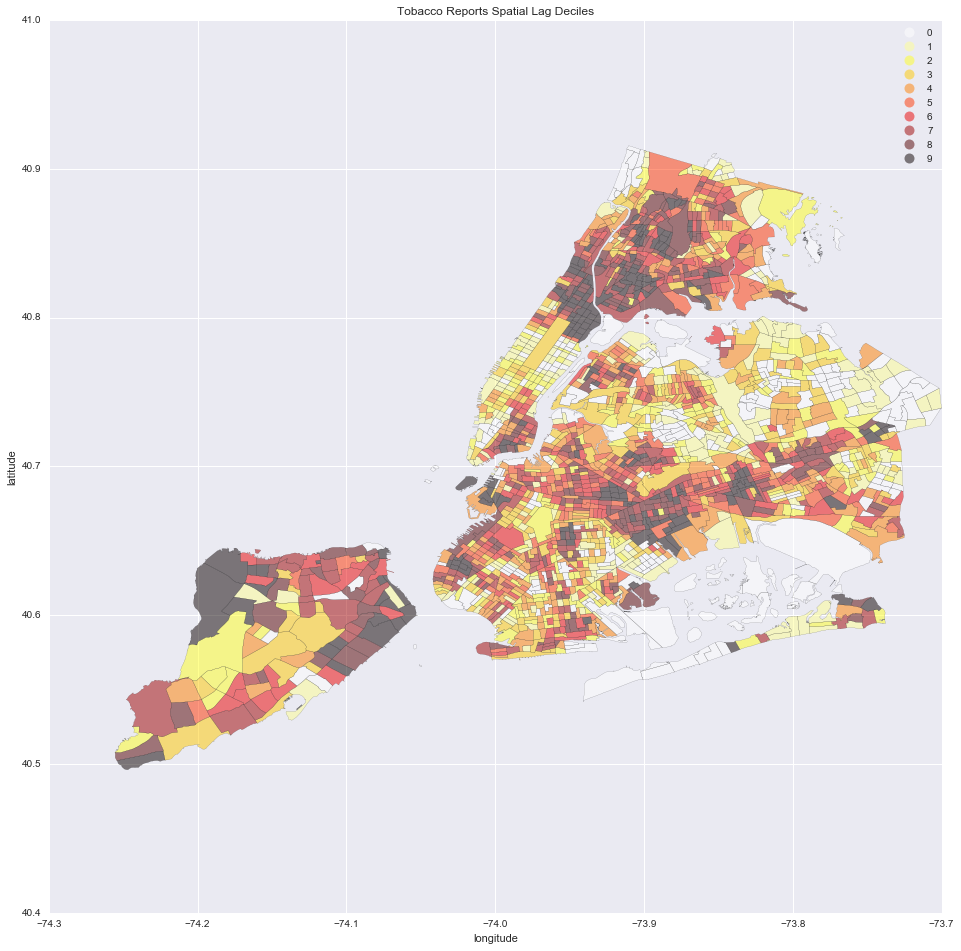

In [25]:
f, ax = plt.subplots(figsize=(16,16))
ct_shape_report.assign(cl=ReportLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Tobacco Reports Spatial Lag Deciles")
plt.savefig('Map_NReports_SpatialLag.png')

In [26]:
#spatial correlation
b,a = np.polyfit(Report, ReportLag, 1)
b, a

(0.16678166556774007, 1.1200209591881942)

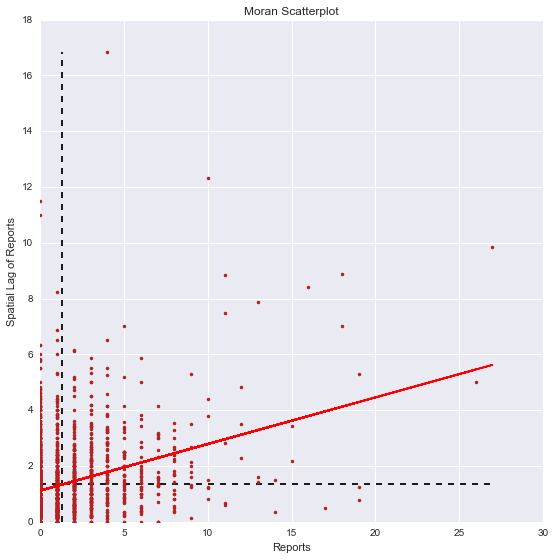

In [27]:
#Moran global 
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(Report, ReportLag, '.', color='firebrick')

plt.vlines(Report.mean(), ReportLag.min(), ReportLag.max(), linestyle='--')

plt.hlines(ReportLag.mean(), Report.min(), Report.max(), linestyle='--')

plt.plot(Report, a + b*Report, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Reports')
plt.xlabel('Reports')

In [28]:
#Moran's I
I_Report = ps.Moran(Report, qW_CT)

In [29]:
I_Report.I, I_Report.p_sim #sim - significant level, p value

(0.16702151812991228, 0.001)

### Moran's I result 0.167. This may indicate that the data distrubtion is more random than clustering.

(-0.7, 0.7)

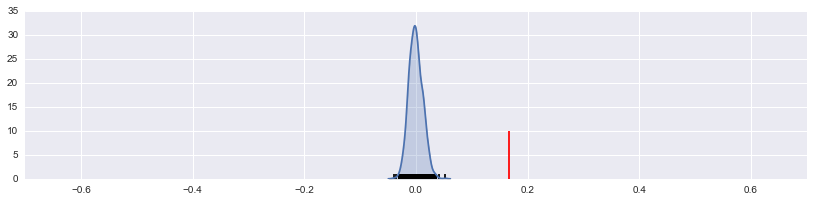

In [30]:
# KDE plot
plt.rcParams['figure.figsize']=(14,3)
sns.kdeplot(I_Report.sim, shade=True)
plt.vlines(I_Report.sim, 0, 1)
plt.vlines(I_Report.I, 0, 10, 'r')
plt.xlim([-.70, .70])

(-0.7, 0.7)

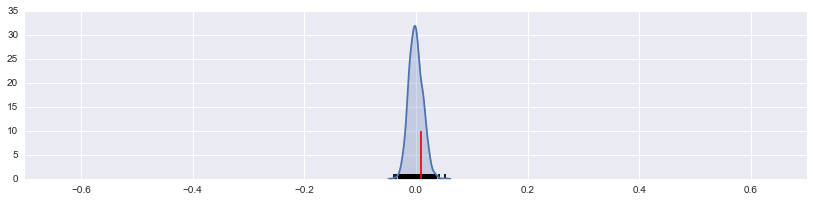

In [31]:
sns.kdeplot(I_Report.sim, shade=True)
plt.vlines(I_Report.sim, 0, 1)
plt.vlines(I_Report.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

In [32]:
#local spatial correlation
L_Report = ps.Moran_Local(Report, qW_CT, permutations=999)

In [33]:
L_Report.Is[0:5], L_Report.p_sim[0:5]

(array([-0.28733122,  0.25764866, -0.82009717,  0.12334253,  0.24443896]),
 array([ 0.104,  0.19 ,  0.039,  0.49 ,  0.358]))

In [34]:
#LISA (Local Indicators of Spatial Autocorrelation)
sigs = Report[L_Report.p_sim <= .001]
W_sigs = ReportLag[L_Report.p_sim <= .001]
insigs = Report[L_Report.p_sim > .001]
W_insigs = ReportLag[L_Report.p_sim > .001]

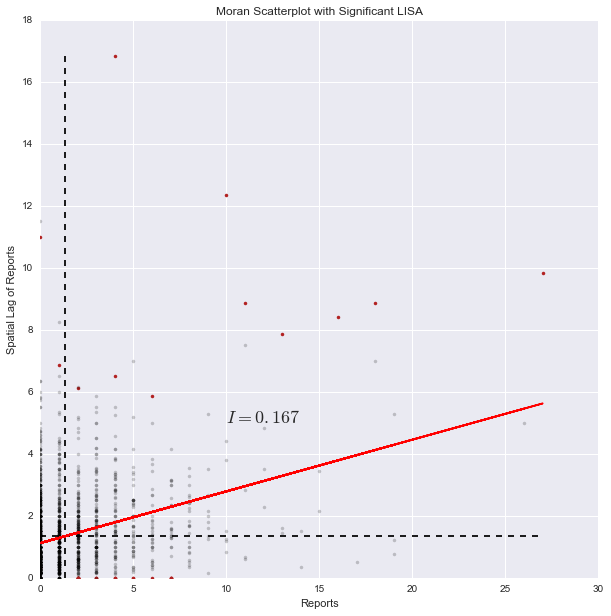

In [35]:
f, ax = plt.subplots(figsize=(10,10))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_Report.I, x=10, y=5, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(Report.mean(), ReportLag.min(), ReportLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(ReportLag.mean(), Report.min(), Report.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(Report, a + b*Report, 'r')
plt.title('Moran Scatterplot with Significant LISA')
plt.ylabel('Spatial Lag of Reports')
plt.xlabel('Reports')


In [36]:
# cold and hot spots
sig = L_Report.p_sim < 0.01  #sig value if set < 0.01, no of spots are small, maybe adjust to 0.1?
hotspots = L_Report.q==1 * sig
coldspots = L_Report.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 29
Number of Coldspots: 11


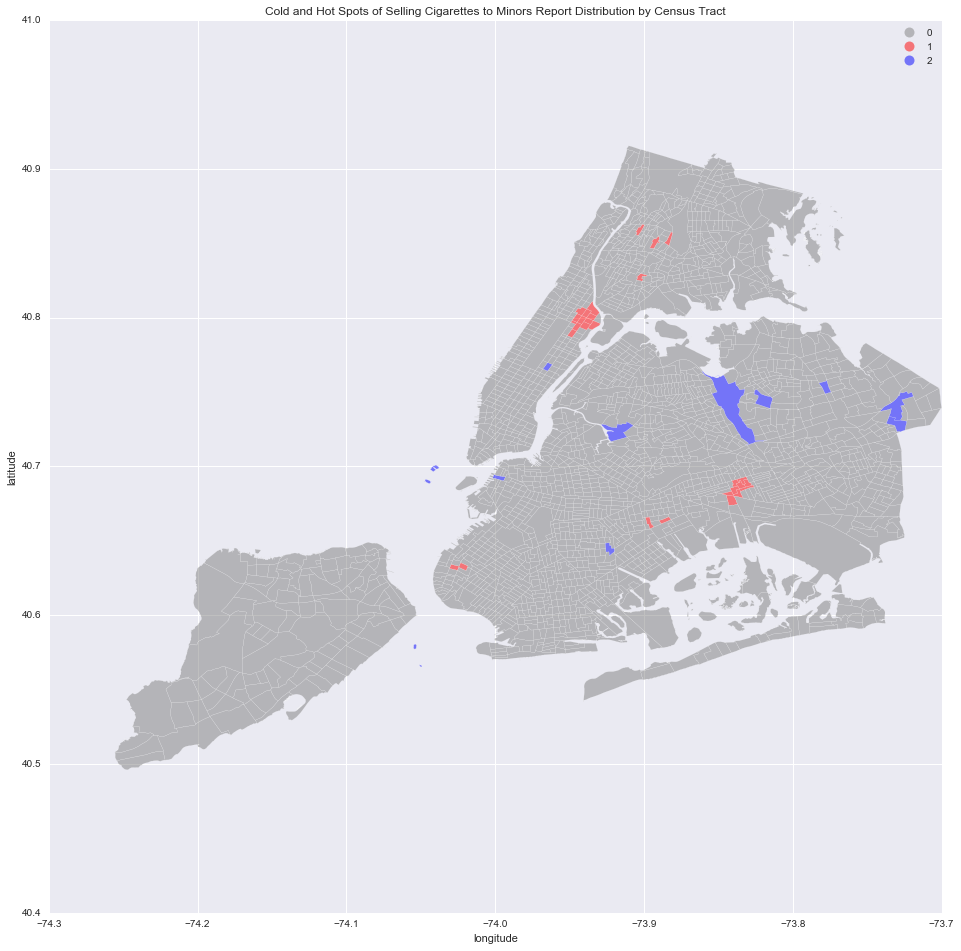

In [37]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(16, 16))
ct_shape_report.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('Cold and Hot Spots of Selling Cigarettes to Minors Report Distribution by Census Tract')
plt.savefig('HotCold_NReports.png')

### These hotspots show areas with relatively higher cluster/density of tobacco stores' selling cigarettes to minors. 

### Biggest cluster is Upper Manhattan East Harlem.

In [38]:
#explore the area
ct_shape_report[hotspots].sort_values('BoroName')

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,n_report,Total Population,MHI,n_tobacco
BoroCT2010,,,,,,,,,,,,,,,,
2037504,2037504,2,Bronx,E,037504,375.04,BX17,East Tremont,3705,2.585511e+06,8835.916712,POLYGON ((-73.89003039557711 40.85422099167823...,2.0,3677.0,19500.0,12.0
2013500,2013500,2,Bronx,E,013500,135,BX35,Morrisania-Melrose,3705,1.805899e+06,6989.101116,POLYGON ((-73.89820469327977 40.82788910998481...,2.0,3583.0,16782.0,4.0
2023900,2023900,2,Bronx,E,023900,239,BX40,Fordham South,3707,1.912484e+06,7299.846846,POLYGON ((-73.89964261686002 40.86221043694763...,4.0,8348.0,19246.0,16.0
2039300,2039300,2,Bronx,E,039300,393,BX06,Belmont,3705,1.970412e+06,7785.518713,POLYGON ((-73.88079155209067 40.85712750872769...,6.0,8143.0,17988.0,10.0
3013000,3013000,3,Brooklyn,E,013000,130,BK31,Bay Ridge,4013,1.899182e+06,5648.236506,POLYGON ((-74.01852943982885 40.63233357712795...,11.0,4792.0,46037.0,6.0
3112200,3112200,3,Brooklyn,E,112200,1122,BK85,East New York (Pennsylvania Ave),4007,1.747124e+06,5931.016912,"POLYGON ((-73.8818555734476 40.66414998854015,...",3.0,3371.0,43485.0,4.0
3113000,3113000,3,Brooklyn,E,113000,1130,BK85,East New York (Pennsylvania Ave),4007,2.086281e+06,7587.901797,POLYGON ((-73.89553070809033 40.66294485740155...,3.0,3891.0,29722.0,4.0
3006600,3006600,3,Brooklyn,E,006600,66,BK31,Bay Ridge,4013,1.653273e+06,5243.925222,POLYGON ((-74.02423774621629 40.63285893186256...,5.0,3663.0,47119.0,5.0
1018000,1018000,1,Manhattan,E,018000,180,MN34,East Harlem North,3804,2.288095e+06,6055.953593,POLYGON ((-73.93591226963575 40.79531183817083...,4.0,7476.0,23311.0,10.0


### Compare median household income, total population and number of tobacco stores in Hotspot and Coldspot areas

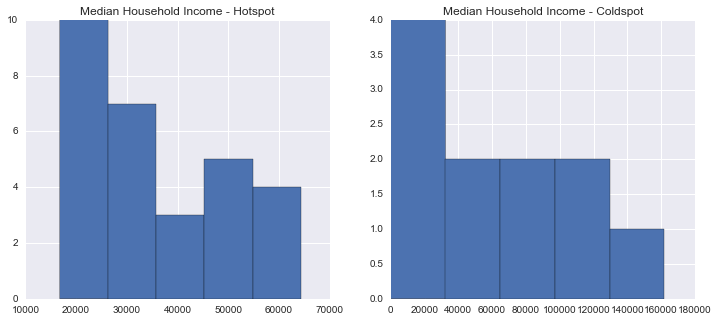

In [49]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ct_shape_report[hotspots]['MHI'].hist(bins=5)
ax.set_title('Median Household Income - Hotspot')
ax = fig.add_subplot(122)
ct_shape_report[coldspots]['MHI'].hist(bins=5)
ax.set_title('Median Household Income - Coldspot')

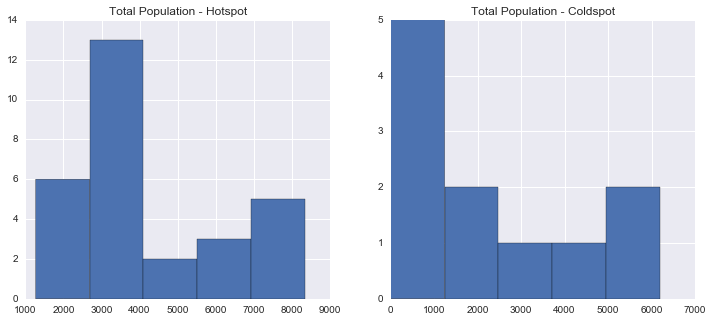

In [40]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ct_shape_report[hotspots]['Total Population'].hist(bins=5)
ax.set_title('Total Population - Hotspot')
ax = fig.add_subplot(122)
ct_shape_report[coldspots]['Total Population'].hist(bins=5)
ax.set_title('Total Population - Coldspot')

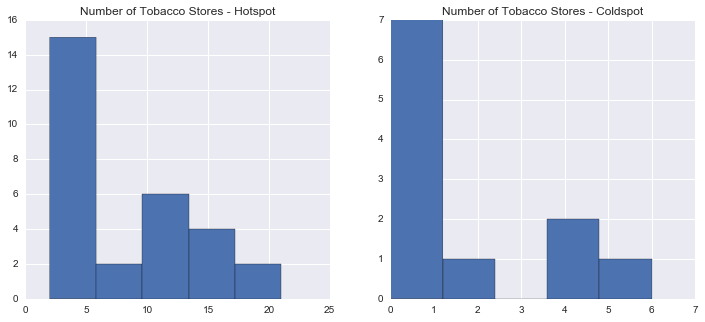

In [43]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ct_shape_report[hotspots]['n_tobacco'].hist(bins=5)
ax.set_title('Number of Tobacco Stores - Hotspot')
ax = fig.add_subplot(122)
ct_shape_report[coldspots]['n_tobacco'].hist(bins=5)
ax.set_title('Number of Tobacco Stores - Coldspot')

In [ ]:
# I tried Moran's I on zoomed in area (manhattan) the outcome did not make much different. 
# http://www.statisticshowto.com/morans-i/


In [51]:
ct_data.corr()

,BoroCT2010,Total Population,MHI,longitude,n_report,n_tobacco,latitude
BoroCT2010,1.000000,-0.264784,0.003967,0.137625,-0.078561,-0.292874,-0.528892
Total Population,-0.264784,1.000000,-0.030815,-0.116209,0.150361,0.340265,0.187901
MHI,0.003967,-0.030815,1.000000,-0.103918,-0.196994,-0.075649,-0.129036
longitude,0.137625,-0.116209,-0.103918,1.000000,-0.042986,-0.152628,0.384335
n_report,-0.078561,0.150361,-0.196994,-0.042986,1.000000,0.330641,0.055574
n_tobacco,-0.292874,0.340265,-0.075649,-0.152628,0.330641,1.000000,0.164946
latitude,-0.528892,0.187901,-0.129036,0.384335,0.055574,0.164946,1.000000


## DBSCAN Analysis

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets
import seaborn as sns; sns.set()

%matplotlib inline

In [5]:
minor = pd.read_csv('minor.csv')

In [6]:
a = minor.iloc[:,-3:-1]
a.dropna(inplace=True)

In [7]:
x = np.array(a)

In [8]:
x.shape

(3396, 2)

In [9]:
a.head()

,Latitude,Longitude
0,40.732942,-73.849605
1,40.827963,-73.850106
2,40.867823,-73.899137
3,40.843370,-73.904888
4,40.651802,-73.945802


In [12]:
from geopandas import GeoDataFrame
import geopandas as gpd

In [13]:
filePath = "Borough Boundaries.geojson"
NYCBoroughs = GeoDataFrame.from_file(filePath)


eps = 0.00320093198098 , min_samples = 40 , num_detected_points = 86


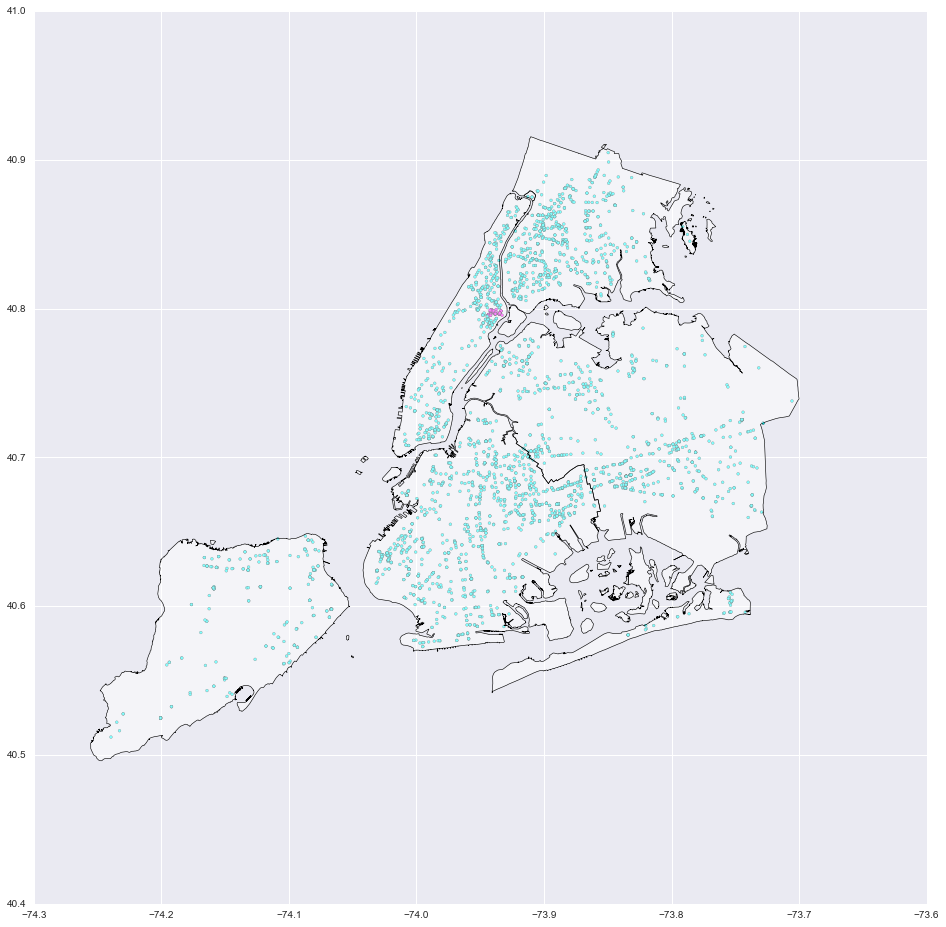

eps = 0.0115035530902 , min_samples = 140 , num_detected_points = 238


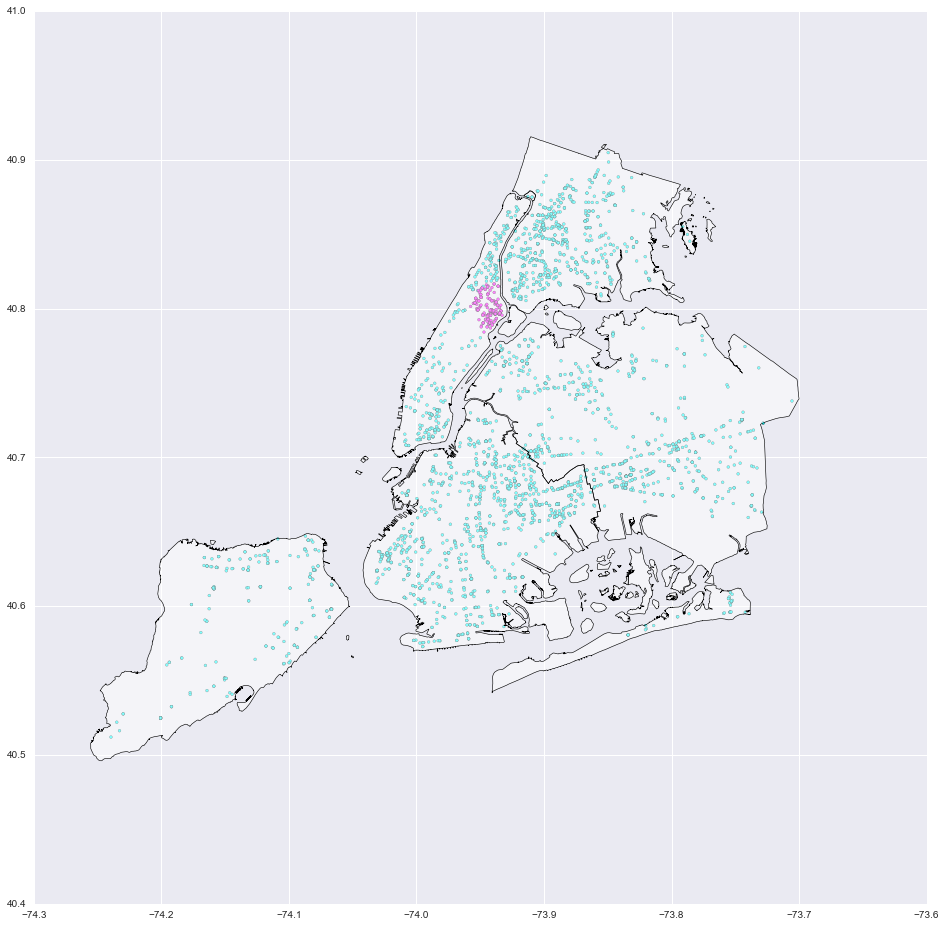

eps = 0.0115035530902 , min_samples = 160 , num_detected_points = 233


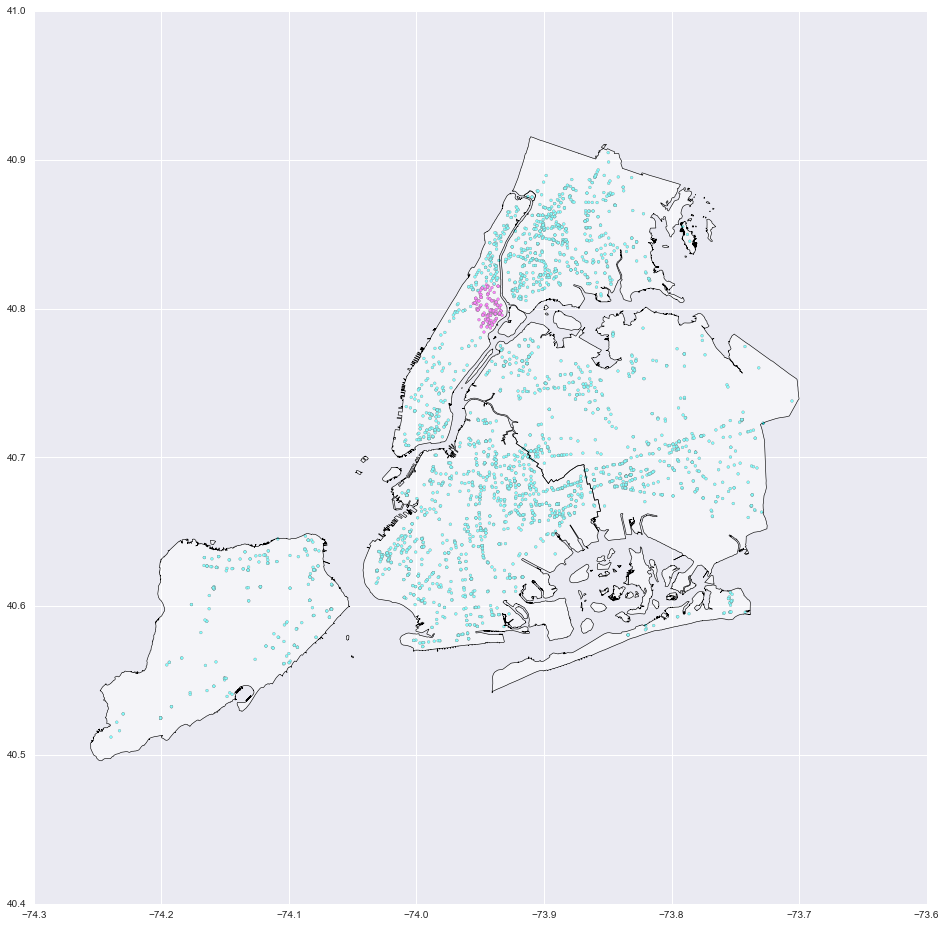

eps = 0.0115035530902 , min_samples = 180 , num_detected_points = 210


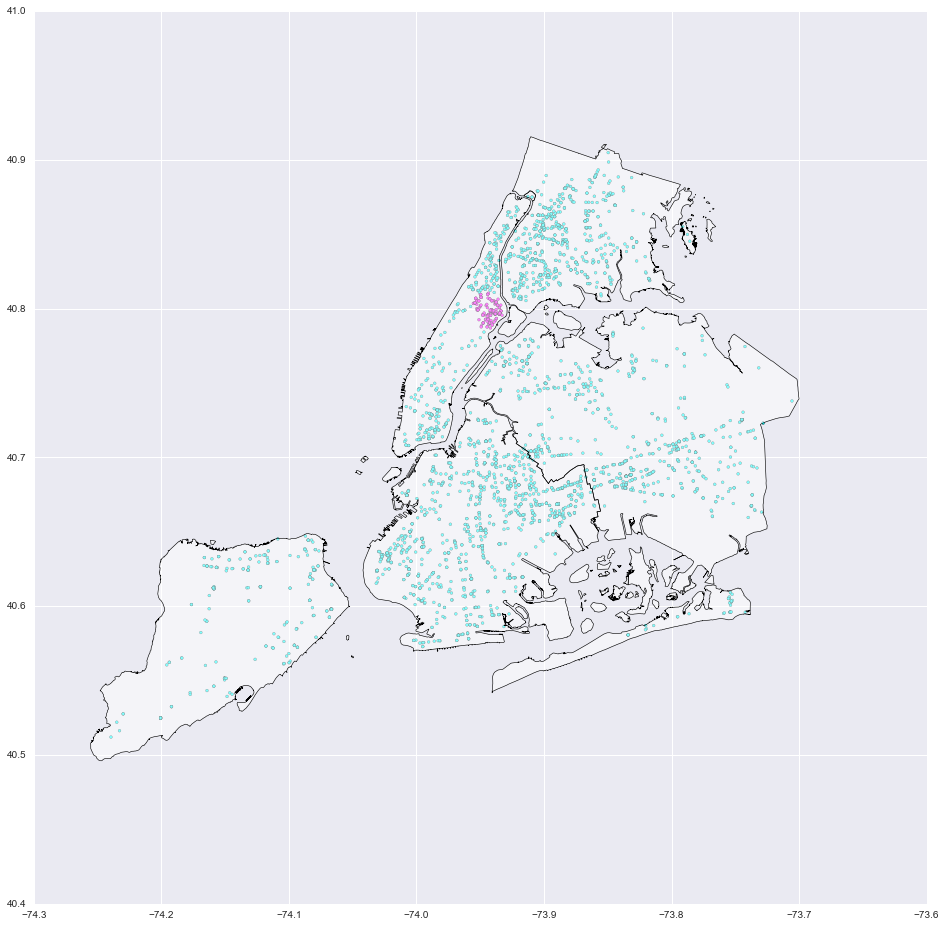

In [24]:
total_num_samples = len(x[:,0])
max_eps = max(np.max(x[:,1])-np.min(x[:,1]),np.max(x[:,0])-np.min(x[:,0]))

for eps in np.logspace(np.log10(max_eps)-5,np.log10(max_eps),10):
            for min_samples in range(40,200,20):
                db = DBSCAN(eps, min_samples).fit(x)
                num_clustered = len(db.labels_[db.labels_ >= 0])
                if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
                    print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
                    f, ax = plt.subplots(figsize=(16,16))
                    NYCBoroughs.plot(linewidth = 0.6,alpha = 0.5, color = 'white', ax = ax)
                    plt.scatter(x[:,1],x[:,0],c=db.labels_,s=8,cmap=plt.cm.cool)
                    
                    plt.show()